# Age_Estimator_Error_Check_With_Linear_Regression

In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 
import pylab
from scipy import stats
# from scipy.stats import kurtosis, skew
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Settings
# %matplotlib inline
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 30
# pd.set_option('display.precision', 4)

In [7]:
#load data
# data = pd.read_excel('..\\data\\Output\\Interpolation_Age_Results.xlsx', index_col='EquipmentCode')
data = pd.read_csv('..\\data\\BZY.csv', index_col='EquipmentCode')
# data = data.drop(['ModelName'],axis=1)
#Verify data types
data.columns
#Verify data size
data.shape
# data = data.dropna()

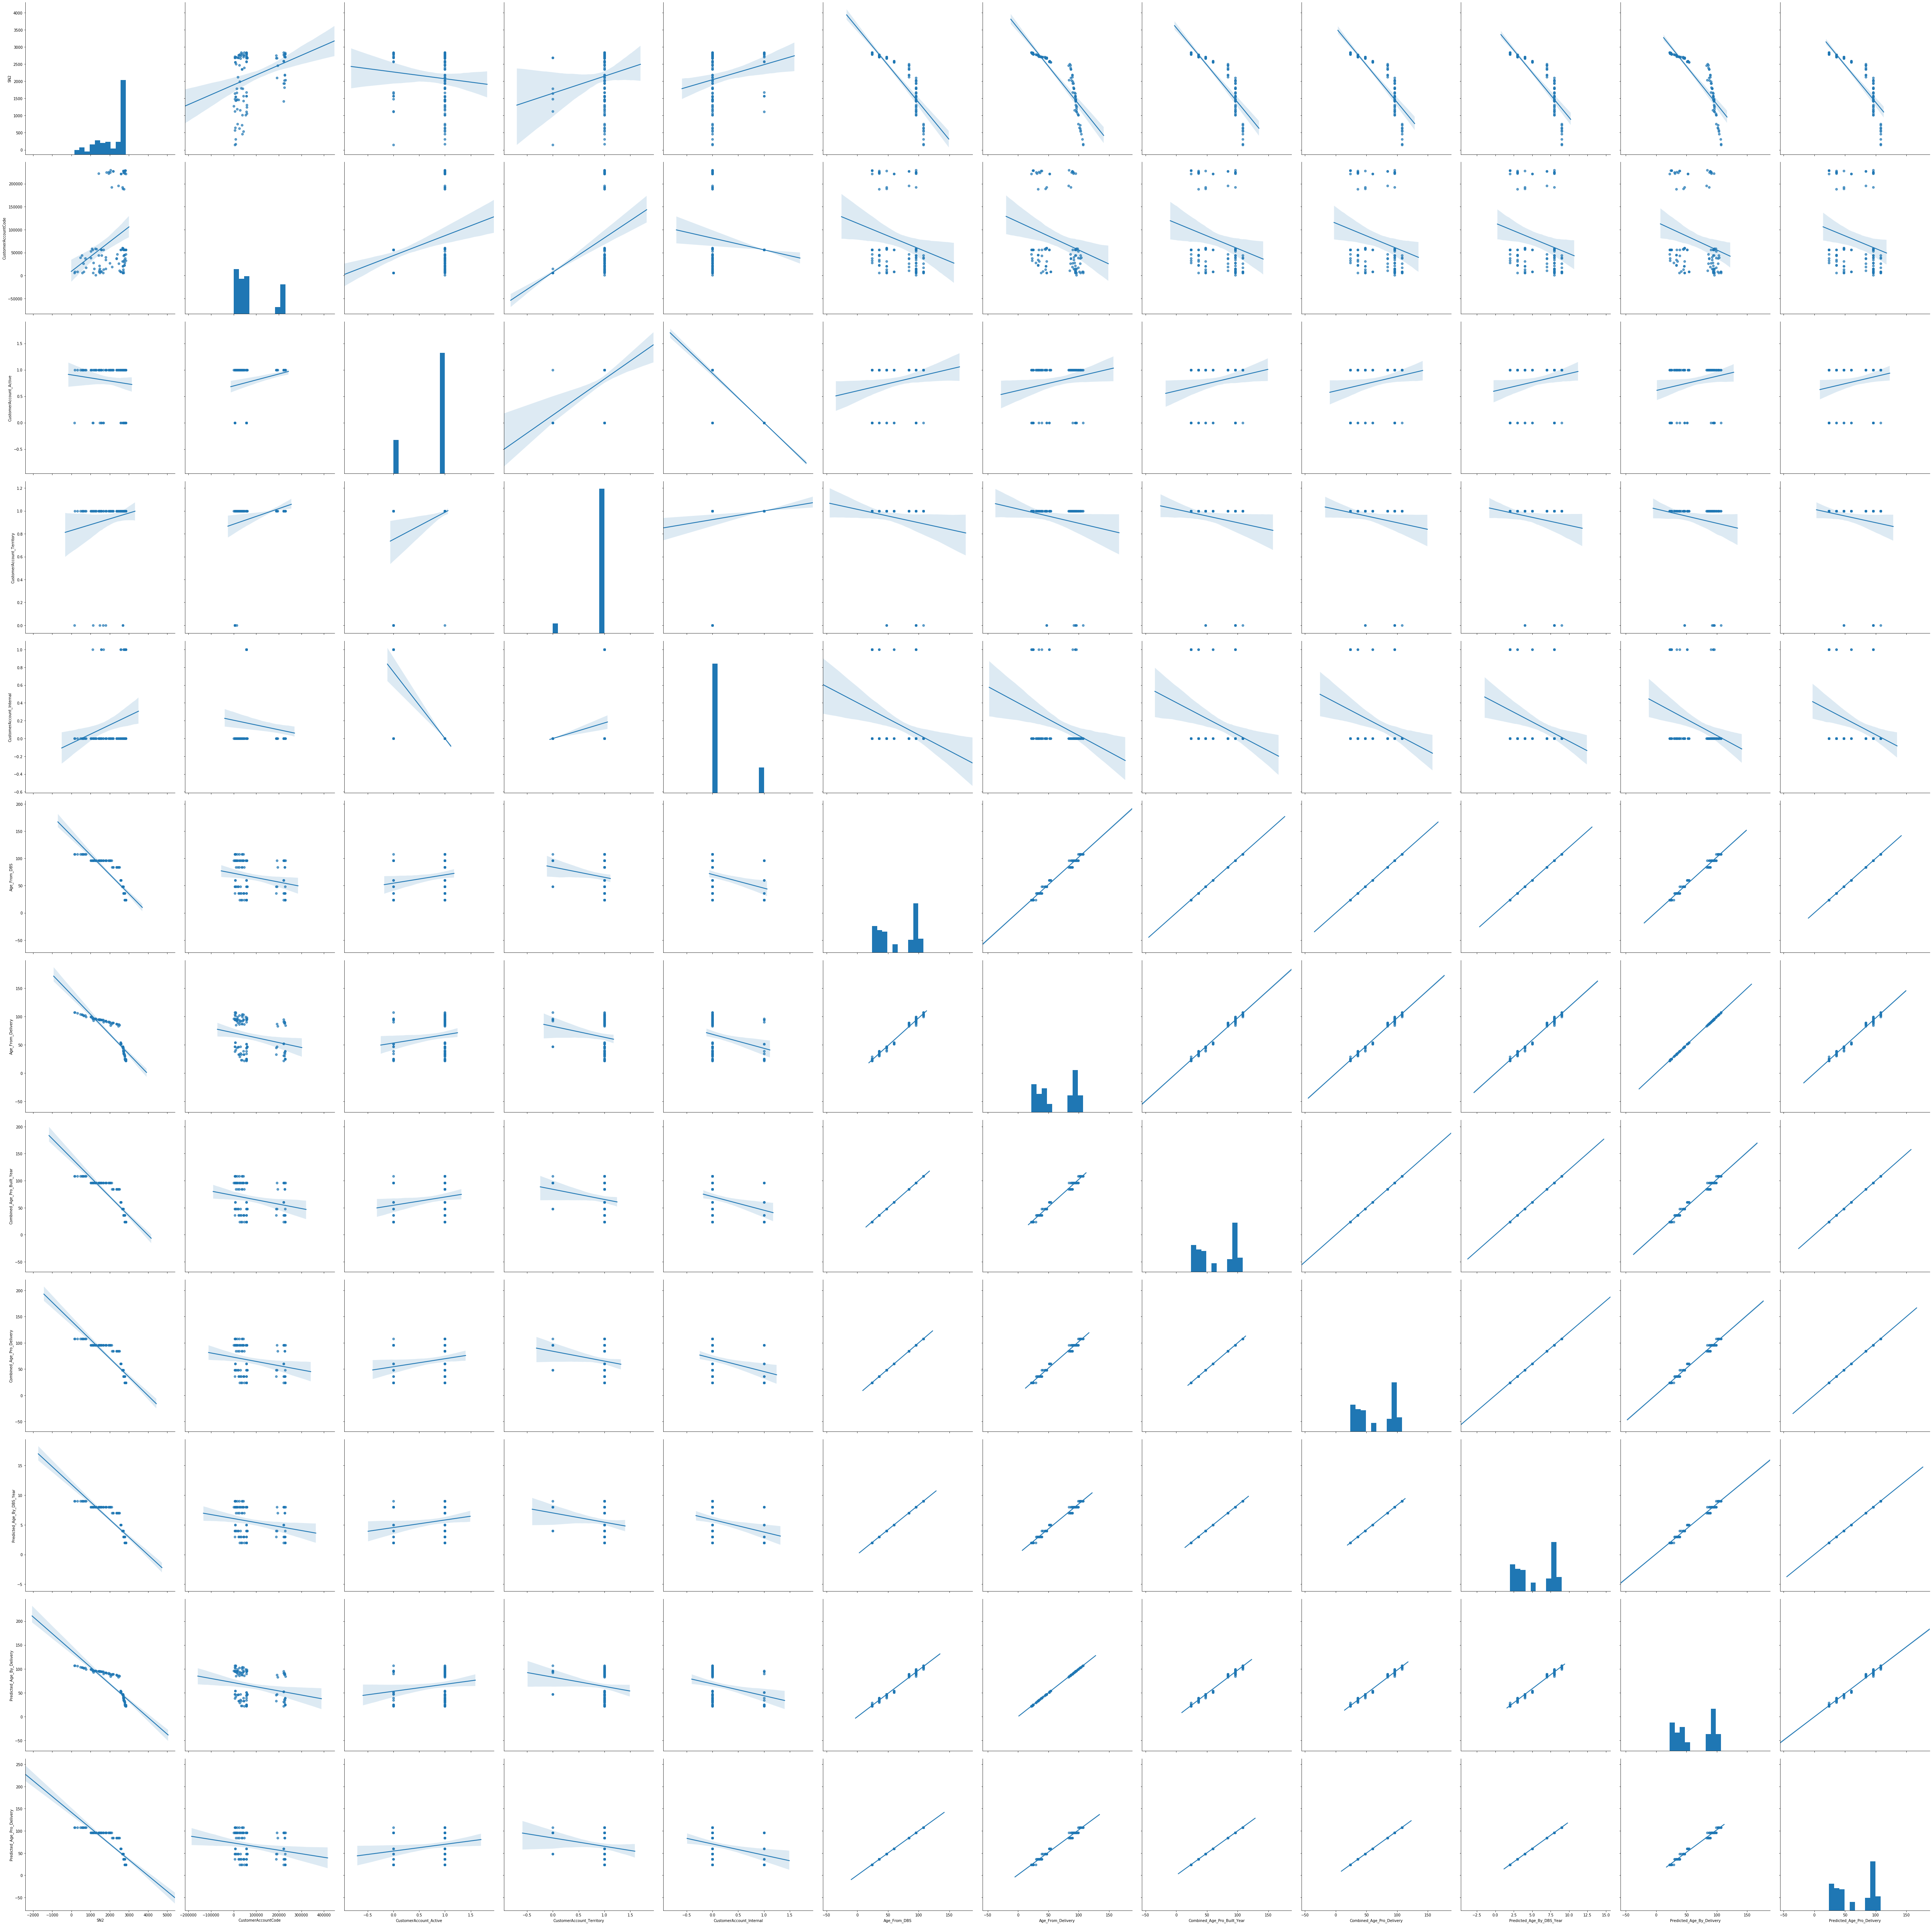

In [9]:

# sns.pairplot(data, kind='reg', diag_kind='hist',
# # height=6, aspect=1,
# plot_kws={'scatter_kws': {'alpha': 0.7}})

# plt.show()

In [4]:
data.describe()

,SN2,CustomerAccountCode,CustomerAccount_Active,CustomerAccount_Territory,CustomerAccount_Internal,Age_From_DBS,Age_From_Delivery,Combined_Age_Pro_Built_Year,Combined_Age_Pro_Delivery,Predicted_Age_By_DBS_Year,Predicted_Age_By_Delivery,Predicted_Age_Pro_Delivery
count,433.000000,433.00000,433.000000,433.000000,433.000000,189.000000,110.000000,189.000000,189.000000,433.000000,433.000000,433.000000
mean,1950.307159,96474.39030,0.639723,0.930716,0.080831,76.698413,64.427273,76.698413,76.698413,5.835077,67.598326,70.020922
std,945.576417,99319.21039,0.480636,0.254230,0.272891,30.406100,30.557649,30.406100,30.406100,2.674184,31.638433,32.090211
min,138.000000,1102.00000,0.000000,0.000000,0.000000,24.000000,22.000000,24.000000,24.000000,2.000000,22.000000,24.000000
25%,1037.000000,25957.00000,0.000000,1.000000,0.000000,48.000000,34.000000,48.000000,48.000000,3.000000,34.400000,36.000000
50%,2446.000000,56026.00000,1.000000,1.000000,0.000000,96.000000,54.000000,96.000000,96.000000,7.000000,85.409091,84.000000
75%,2734.000000,119061.00000,1.000000,1.000000,0.000000,96.000000,94.000000,96.000000,96.000000,8.000000,98.568182,96.000000
max,7292.000000,547122.00000,1.000000,1.000000,1.000000,120.000000,107.000000,120.000000,120.000000,10.000000,107.000000,120.000000


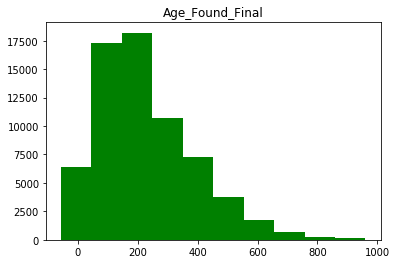

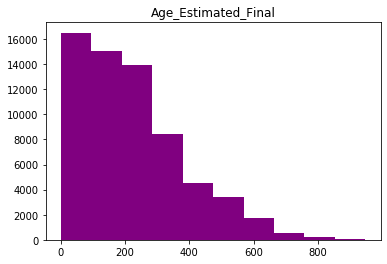

In [8]:
#Convert data to float for calculations
test = data.astype(float)

Y = test[['Age_Found_Final']]
X = test[['Age_Estimated_Final']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

(66382, 2)

In [11]:
test = test.drop(test.index[test.Age_Estimated_Final > 240]) #Drop equipment over 180 months old to get normal distribution
test = test.drop(test.index[test.Age_Found_Final > 240]) #Drop equipment over 180 months old to get normal distribution
test.shape

(29960, 4)

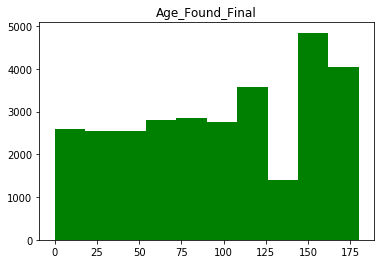

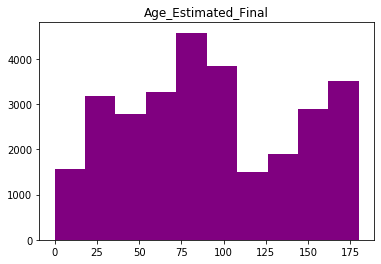

In [12]:
Y = test[['Age_Found_Final']]
X = test[['Age_Estimated_Final']]
Y.hist(grid = False, color = 'green')
plt.show()
X.hist(grid = False, color = 'purple')
plt.show()

# Test 1 Age_Estimated_Final VS Age_Found_Final

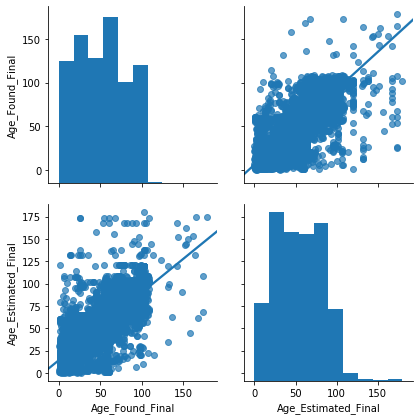

In [32]:
tp1 = test[['Age_Found_Final','Age_Estimated_Final']]
#Scatter plot
sns.pairplot(tp1, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

In [33]:
test = test.dropna()
#Define Variable
Y = test[['Age_Found_Final']]
X = test[['Age_Estimated_Final']]

# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Age_Found_Final   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          1.088e+05
Date:                Tue, 19 May 2020   Prob (F-statistic):                        0.00
Time:                        18:37:13   Log-Likelihood:                         -44256.
No. Observations:               10320   AIC:                                  8.851e+04
Df Residuals:                   10319   BIC:                                  8.852e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [34]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 304.72654256000374
MAE 12.857904882224622
RMSE 17.45641837720452


In [35]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.65


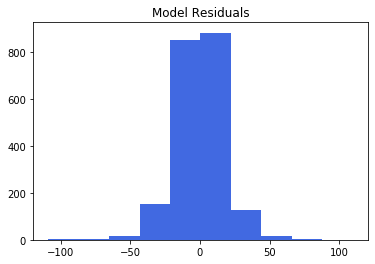

In [36]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

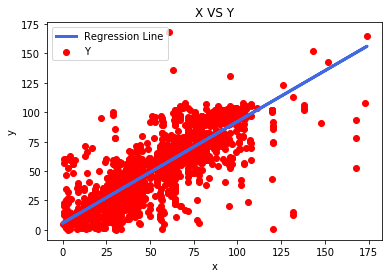

In [37]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Test 2 Age_Estimated_Final VS Delivery_Date

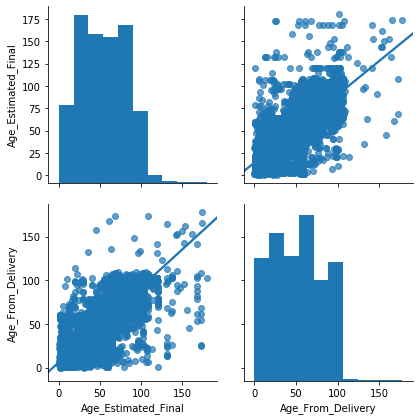

In [38]:
tp2 = test[['Age_Estimated_Final','Age_From_Delivery']]
#Scatter plot
sns.pairplot(tp2, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

In [39]:
#Define Variable
test = test.dropna()
Y = test[['Age_From_Delivery']]
X = test[['Age_Estimated_Final']]

# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Age_From_Delivery   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          1.088e+05
Date:                Tue, 19 May 2020   Prob (F-statistic):                        0.00
Time:                        18:37:23   Log-Likelihood:                         -44256.
No. Observations:               10320   AIC:                                  8.851e+04
Df Residuals:                   10319   BIC:                                  8.852e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [40]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 304.72654256000374
MAE 12.857904882224622
RMSE 17.45641837720452


In [41]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.65


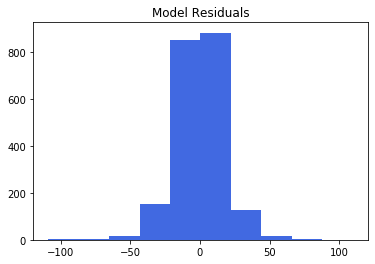

In [42]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

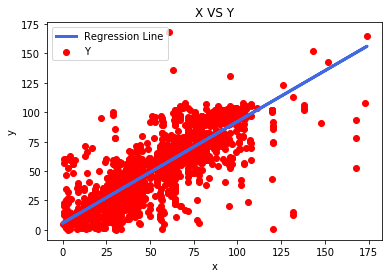

In [43]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Test 3 Age_Estimated_Final VS DBS_Age

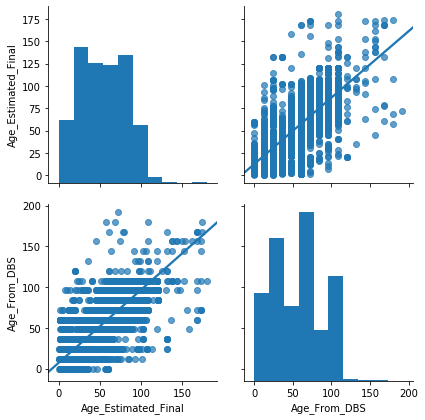

In [44]:
tp3 = test[['Age_Estimated_Final','Age_From_DBS']]
#Scatter plot
sns.pairplot(tp3, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

In [45]:
#Define Variable
Y = test[['Age_Estimated_Final']]
X = test[['Age_From_DBS']]

# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Age_Estimated_Final   R-squared (uncentered):                   0.919
Model:                             OLS   Adj. R-squared (uncentered):              0.919
Method:                  Least Squares   F-statistic:                          1.169e+05
Date:                 Tue, 19 May 2020   Prob (F-statistic):                        0.00
Time:                         18:37:32   Log-Likelihood:                         -43998.
No. Observations:                10320   AIC:                                  8.800e+04
Df Residuals:                    10319   BIC:                                  8.801e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [46]:
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object.
single_regression_model = LinearRegression()
# pass through the X_train & y_train data set.
single_regression_model.fit(x_train, y_train)

# create prediction value
y_predict = single_regression_model.predict(x_test)

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:3}".format(model_mse))
print("MAE {:3}".format(model_mae))
print("RMSE {:3}".format(model_rmse))

MSE 264.8866480808056
MAE 12.038379091980284
RMSE 16.27533864719274


In [47]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.67


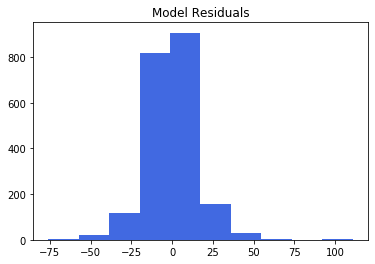

In [48]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

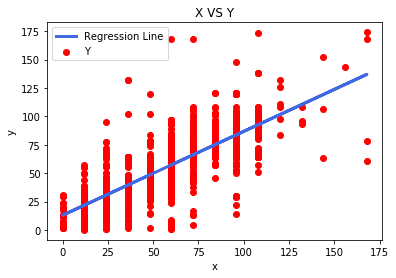

In [49]:
# Plot outputs
plt.scatter(x_test, y_test,  color='red', label = 'Y')
plt.plot(x_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("X VS Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Test 4 Interpolation

In [6]:
data.head()

,SN1,SN2,Age_Found,Age_Prediction
EquipmentCode,,,,
354513,BZY,2626,NaN,57.833333
354699,BZY,2620,NaN,59.277778
354700,BZY,2601,NaN,60.000000
354724,BZY,2719,NaN,36.000000
354728,BZY,2757,NaN,33.000000


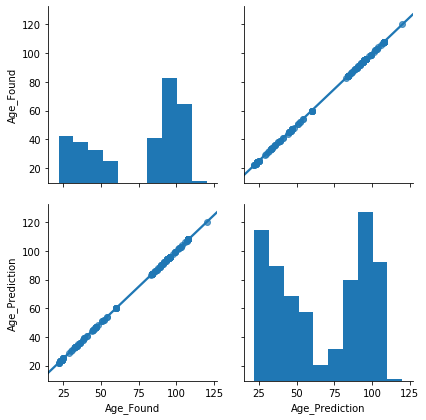

In [10]:
test = data[['Age_Found','Age_Prediction']]
#Scatter plot
sns.pairplot(test, kind='reg', diag_kind='hist',
             height=3, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
#plt.savefig('..\\data\\Output\\1')

In [11]:
#Define Variable
Y = test[['Age_Found']]
X = test[['Age_Prediction']]

# create a OLS model.
model = sm.OLS(Y, X)

#Print
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Age_Found   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Wed, 20 May 2020   Prob (F-statistic):                         nan
Time:                        08:13:59   Log-Likelihood:                             nan
No. Observations:                 433   AIC:                                        nan
Df Residuals:                     432   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------